In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [7]:
df = pd.read_csv('./data/yearly_right.csv')

In [9]:
df.columns = ['year','r_under_0.1','r_0.2-0.4','r_0.5-0.7','r_0.8-1.0','r_1.1-1.5','r_1.6-2.0']

In [11]:
years = ['2011-01-01',
         '2012-01-01',
         '2013-01-01',
         '2014-01-01',
         '2015-01-01',
         '2016-01-01',
         '2017-01-01',
         '2018-01-01', ]

In [12]:
df['year'] = pd.to_datetime(years,format="%Y",infer_datetime_format=True)
df

,year,r_under_0.1,r_0.2-0.4,r_0.5-0.7,r_0.8-1.0,r_1.1-1.5,r_1.6-2.0
0,2011-01-01,154576,812001,2039710,4364846,3493083,130366
1,2012-01-01,136696,824991,2123844,4531453,3609146,119395
2,2013-01-01,132450,818317,2141222,4537142,3598555,113016
3,2014-01-01,137906,856088,2304111,4934732,3910983,115374
4,2015-01-01,151692,952408,2633252,5651838,4459447,128538
5,2016-01-01,152642,961137,2745615,5937871,4575818,126629
6,2017-01-01,151740,966773,2814221,6099580,4606251,117961
7,2018-01-01,149482,965838,2881103,6259017,4661151,111860


In [7]:
df['year'] = pd.to_datetime(df['year'], unit='s')

In [13]:
upsampled = df.set_index('year').resample('D')
# resampled = upsampled.resample('Q')
interpolated = upsampled.interpolate(method='quadratic')

In [15]:
interpolated

,r_under_0.1,r_0.2-0.4,r_0.5-0.7,r_0.8-1.0,r_1.1-1.5,r_1.6-2.0
year,,,,,,
2011-01-01,154576.000000,812001.000000,2.039710e+06,4.364846e+06,3.493083e+06,130366.000000
2011-01-02,154507.365550,812076.735695,2.040078e+06,4.365649e+06,3.493678e+06,130330.346864
2011-01-03,154438.839057,812152.250805,2.040445e+06,4.366450e+06,3.494271e+06,130294.724473
2011-01-04,154370.420520,812227.545328,2.040811e+06,4.367249e+06,3.494862e+06,130259.132827
2011-01-05,154302.109941,812302.619266,2.041177e+06,4.368047e+06,3.495452e+06,130223.571927
...,...,...,...,...,...,...
2017-12-28,149515.970106,965904.430857,2.880377e+06,6.257234e+06,4.660386e+06,111906.511422
2017-12-29,149507.496745,965887.939869,2.880558e+06,6.257680e+06,4.660577e+06,111894.841291
2017-12-30,149499.010607,965871.371064,2.880740e+06,6.258125e+06,4.660768e+06,111883.199343


In [16]:
interpolated.round().astype(int)

,r_under_0.1,r_0.2-0.4,r_0.5-0.7,r_0.8-1.0,r_1.1-1.5,r_1.6-2.0
year,,,,,,
2011-01-01,154576,812001,2039710,4364846,3493083,130366
2011-01-02,154507,812077,2040078,4365649,3493678,130330
2011-01-03,154439,812152,2040445,4366450,3494271,130295
2011-01-04,154370,812228,2040811,4367249,3494862,130259
2011-01-05,154302,812303,2041177,4368047,3495452,130224
...,...,...,...,...,...,...
2017-12-28,149516,965904,2880377,6257234,4660386,111907
2017-12-29,149507,965888,2880558,6257680,4660577,111895
2017-12-30,149499,965871,2880740,6258125,4660768,111883


In [17]:
interpolated.reset_index().to_csv('./data/daily_right.csv', index=False)

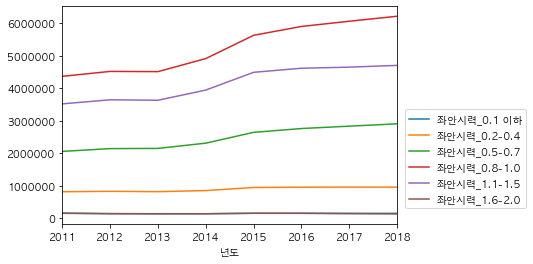

In [64]:
df.set_index('년도').plot()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.3))
# plt.savefig('일별좌안시력_before_upsampling.png',bbox_inces='tight',pad_inches=0)
plt.show()


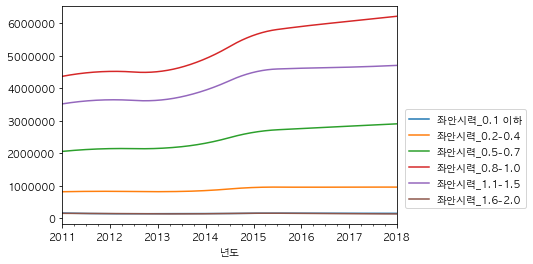

In [58]:
interpolated.plot()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.3))


# 분기별 

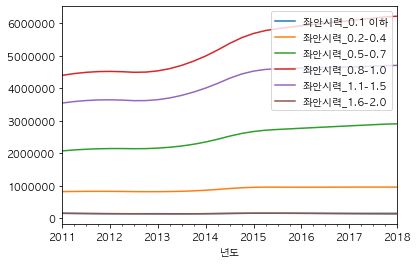

In [103]:
resample = interpolated.resample('Q')
quarterly_mean_sales = resample.mean().round().astype(int)
quarterly_mean_sales.plot()

In [105]:
quarterly_mean_sales.reset_index().to_csv('./data/분기별_좌안시력.csv', index=False)

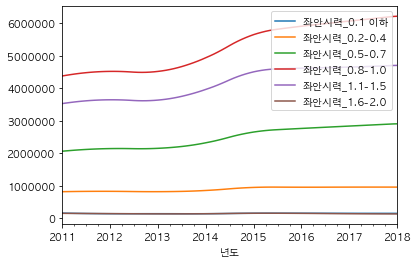

In [153]:
quarterly_mean_sales.plot()

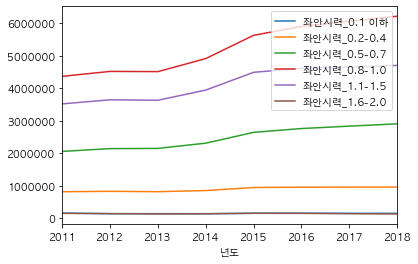

In [154]:
df.set_index('년도').plot()

In [157]:
quarterly_mean_sales

,좌안시력_0.1 이하,좌안시력_0.2-0.4,좌안시력_0.5-0.7,좌안시력_0.8-1.0,좌안시력_1.1-1.5,좌안시력_1.6-2.0
년도,,,,,,
2011-01-31,150808.656974,810889.446991,2.056239e+06,4.371385e+06,3.521993e+06,144753.801208
2011-02-28,148644.297876,813044.499092,2.067064e+06,4.392199e+06,3.539525e+06,144036.923410
2011-03-31,146622.824929,814974.767944,2.077118e+06,4.411329e+06,3.555605e+06,143322.135001
2011-04-30,144678.915783,816740.648876,2.086725e+06,4.429385e+06,3.570748e+06,142585.252689
2011-05-31,142886.019271,818268.962276,2.095519e+06,4.445662e+06,3.584358e+06,141850.578597
...,...,...,...,...,...,...
2017-09-30,144769.951819,952383.047577,2.877854e+06,6.163600e+06,4.677825e+06,128492.126238
2017-10-31,144696.202735,952320.663524,2.883829e+06,6.176425e+06,4.682942e+06,128036.175110
2017-11-30,144632.623207,952225.686651,2.889799e+06,6.189241e+06,4.688253e+06,127616.828531


In [161]:
tmp  = quarterly_mean_sales.reset_index()

In [162]:
tmp.to_csv('월별_좌안시력.csv',index=False)

In [158]:
quarterly_mean_sales.reset_index().to_csv('월별_좌안시력.csv')